In [1]:
import sys

import numpy as np
import pytest

import connectfour as c4
from connectfour import game

%load_ext autoreload
%autoreload 2

In [293]:
array = np.array([[0,1,0,0],[0,-1,0,1],[1,-1,1,-1]])
board = game.ConnectFourBoard.from_array(array)

To see model details, enter:
	>>> <pvn>.summary()


In [85]:
# define policy evaluator
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
# instantiate new player using that policy
player = c4.player.AzPlayer(evaluator)

# create empty board
board = c4.game.ConnectFourBoard()

state = c4.game.ConnectFourGameState(board)
node = c4.mcts.MctsNode(state, evaluator=evaluator)
player.play(node, tau=.1, n_sims=400)

(MCTS Action:(Move:x:3 p:1),
 array([2.26683569e-21, 2.32123975e-08, 7.53781063e-08, 9.99999847e-01,
        4.78414838e-08, 6.10661483e-09, 1.30717169e-19]))

In [10]:
import yaml

with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
config

{'name': 'test',
 'game': {'board': {'width': 7, 'height': 6}, 'n_to_win': 4},
 'pvn': {'block_size': 1, 'l2_const': '1e-4'},
 'training': {'dummy': 0},
 'mcts': {'C_PUCT': 4, 'sims': 100, 'tau': 1},
 'player': {'evaluator': 'models/gen9.h5'},
 'selfplay': {'tau_start': 1, 'tau_end': 0.1, 'threshold': 10},
 'paths': {'log': 'logs/', 'models': 'models/'}}

In [20]:
# define policy evaluator
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
# instantiate new player using that policy
player = c4.player.AzPlayer(evaluator)

# create empty board
board = c4.game.ConnectFourBoard()

state = c4.game.ConnectFourGameState(board)
node = c4.mcts.MctsNode(state, evaluator=evaluator)
action, policy = player.play(node, tau=.1, n_sims=400)
action, policy

To see model details, enter:
	>>> <pvn>.summary()


2022-03-17 21:34:39.634558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(MCTS Action:(Move:x:3 p:1),
 array([2.26683569e-21, 2.32123975e-08, 7.53781063e-08, 9.99999847e-01,
        4.78414838e-08, 6.10661483e-09, 1.30717169e-19]))

In [13]:
def generate_test_state(played_positions: list[int]) -> game.ConnectFourGameState:
    """allows to generate a state, based on a succession of moves."""
    board = np.zeros(shape=(6,7), dtype=int)
    state = game.ConnectFourGameState(board, next_player=game.Player.x)
    for position in played_positions:
        action = game.ConnectFourAction(position, state.next_player)
        state = state.move(action)
    return state

generate_test_state([1,2])

ConnectFourGameState(board:
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  X  O  .  .  .  .
	next_player=x

In [16]:
(np.zeros((6,7)) == np.zeros((6,7))).all()

True

In [118]:
state.next_player

<Player.x: 1>

In [5]:
state = c4.game.ConnectFourGameState()
state = state.move(c4.game.ConnectFourAction(1,c4.game.Player.x))

In [14]:
generate_test_state([1,2]).__repr__()

'ConnectFourGameState(board:\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  X  O  .  .  .  .\n\tnext_player=x'

In [80]:
state = generate_test_state([3,3,2])
policy, value = evaluator.infer_from_state(state)
print(f"policy: {policy},\nexpected value: {value}")

node = c4.mcts.MctsNode(state=state, evaluator=evaluator)
az_player.play(node, tau=1, n_sims=400)

policy: [0.00693865 0.44742727 0.03963406 0.09377281 0.37541172 0.03537982
 0.00143565],
expected value: -0.1962100863456726


(MCTS Action:(Move:x:4 p:-1),
 array([0.0025, 0.2925, 0.005 , 0.0175, 0.675 , 0.0075, 0.    ]))

In [83]:
from tensorflow.keras.utils import plot_model

plot_model(evaluator.model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [96]:
Board = np.ndarray(shape=(6,7), dtype=int)

In [99]:
np.ndarray(shape=(6,7), dtype=int)

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0],
       [ 1,  1, -1,  0,  0,  0,  0],
       [ 0,  1,  1, -1,  0,  0,  0],
       [ 0,  0,  1,  1, -1,  0,  0]])

In [102]:
def infer_from_sequence(moves: list[int]) -> policy:
    state = generate_test_state(moves)
    p, v = evaluator.infer_from_state(state)
    return p.round(2), round(v, 3)

infer_from_sequence([3])

(array([0.02, 0.05, 0.16, 0.55, 0.1 , 0.09, 0.02], dtype=float32), -0.037)

In [92]:
c4.mcts.MctsAction??

Init signature: c4.mcts.MctsAction(state, move, prior, parent=None)
Docstring:      <no docstring>
Source:        
class MctsAction(object):
    def __init__(self, state, move, prior, parent=None):
        self.state = state
        self.move = move
        self.parent = parent
        self.Q = 0
        self.N = 0
        self.W = 0
        self.P = prior
        self.child = None
        
    def __repr__(self):
        return f"MCTS Action:(Move:{self.move})"

        
    def describe(self):
        print(f"""
        move:      {self.move}
        Q-value:   {self.Q}
        N(visits): {self.N}""")
    
    def take_action(self):
        if self.N == 0:
            new_state = self.state.move(self.move)
            self.child = MctsNode(new_state, self.parent.evaluator, parent=self)
        return self.child
        
    def backpropagate(self, V):
        self.W += V
        self.N += 1
        self.Q = self.W / self.N
        if self.parent:
            self.parent.backpropagate

In [75]:
az_player.evaluator.infer_from_state(state)

(array([0.00693865, 0.44742727, 0.03963406, 0.09377281, 0.37541172,
        0.03537982, 0.00143565], dtype=float32),
 -0.1962100863456726)

In [65]:
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
az_player = c4.player.AzPlayer(evaluator)

state = c4.game.ConnectFourGameState(board=c4.game.ConnectFourBoard(), next_player=c4.game.Player.x)
node = c4.mcts.MctsNode(state, evaluator)
while not node.is_terminal_node():
    print(node.state)
    if node.state.next_player == c4.game.Player.x:

        col = input("your turn! what column do you want to play in [0-6]:")
        col = int(col)
        if col not in list(range(7)):
            col = input("improper value. choose a column between 0 and 6:")
        action = c4.game.ConnectFourAction(x_coordinate=col, player=next_player)
        print(action)
        if not node.state.is_move_legal(action):
            col = input("column is already full. choose another column:")
            action = c4.game.ConnectFourAction(x_coordinate=col, player=next_player)

        state = node.state.move(action)
        node = c4.mcts.MctsNode(state, evaluator)


    else:
        action, policy = az_player.play(node, tau=1, n_sims=10)

        node = action.take_action()

        # discard rest of tree
        node.parent = None

    

To see model details, enter:
	>>> <pvn>.summary()


2022-03-17 22:00:48.088524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


ConnectFourGameState(board:
	ConnectFourBoard
 . . . . . . .
 . . . . . . .
 . . . . . . .
 . . . . . . .
 . . . . . . .
 . . . . . . .
	next_player=x


your turn! what column do you want to play in [0-6]: 3


x:3 p:1
ConnectFourGameState(board:
	ConnectFourBoard
 . . . . . . .
 . . . . . . .
 . . . . . . .
 . . . . . . .
 . . . . . . .
 . . . X . . .
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  .  .  .
  .  .  .  X  .  .  .
	next_player=x


your turn! what column do you want to play in [0-6]: 2


x:2 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  .  .  .
  .  .  X  X  .  .  .
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  .  .  .
  .  O  X  X  .  .  .
	next_player=x


your turn! what column do you want to play in [0-6]: 4


x:4 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  .  .  .
  .  O  X  X  X  .  .
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  .  .  .
  .  O  X  X  X  O  .
	next_player=x


your turn! what column do you want to play in [0-6]: 3


x:3 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  X  .  .  .
  .  .  .  O  .  .  .
  .  O  X  X  X  O  .
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  X  .  .  .
  .  .  O  O  .  .  .
  .  O  X  X  X  O  .
	next_player=x


your turn! what column do you want to play in [0-6]: 4


x:4 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  X  .  .  .
  .  .  O  O  X  .  .
  .  O  X  X  X  O  .
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  X  .  .  .
  .  O  O  O  X  .  .
  .  O  X  X  X  O  .
	next_player=x


your turn! what column do you want to play in [0-6]: 4


x:4 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  X  X  .  .
  .  O  O  O  X  .  .
  .  O  X  X  X  O  .
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  O  .  .
  .  .  .  X  X  .  .
  .  O  O  O  X  .  .
  .  O  X  X  X  O  .
	next_player=x


your turn! what column do you want to play in [0-6]: 5


x:5 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  O  .  .
  .  .  .  X  X  .  .
  .  O  O  O  X  X  .
  .  O  X  X  X  O  .
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  O  .  .
  .  .  O  X  X  .  .
  .  O  O  O  X  X  .
  .  O  X  X  X  O  .
	next_player=x


your turn! what column do you want to play in [0-6]: 6


x:6 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  O  .  .
  .  .  O  X  X  .  .
  .  O  O  O  X  X  .
  .  O  X  X  X  O  X
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  O  .  .
  .  .  O  X  X  .  .
  .  O  O  O  X  X  .
  .  O  X  X  X  O  X
	next_player=x


your turn! what column do you want to play in [0-6]: 0


x:0 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  O  .  .
  .  .  O  X  X  .  .
  .  O  O  O  X  X  .
  X  O  X  X  X  O  X
	next_player=o
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  O  O  O  .  .
  .  .  O  X  X  .  .
  .  O  O  O  X  X  .
  X  O  X  X  X  O  X
	next_player=x


your turn! what column do you want to play in [0-6]: 1


x:1 p:1
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  O  O  O  .  .
  .  X  O  X  X  .  .
  .  O  O  O  X  X  .
  X  O  X  X  X  O  X
	next_player=o


In [55]:
                action, policy = az_player.play(node, tau=1, n_sims=10)
            
                node = action.take_action()
            
                # discard rest of tree
                node.parent = None
                
                node

MCTS NODE: 
ConnectFourGameState(board:
	ConnectFourBoard
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  .  .  .  .
  .  .  .  O  .  .  .
  .  .  .  X  X  .  .
	next_player=o
0.3997

In [8]:

def play_vs_human(self, tau: TemperatureSchedule = TemperatureSchedule(**config['selfplay']), 
                  n_sims: int = config['mcts']['sims']) -> None:
        """player plays against itself and saves its improved policies and game outcome into a GameHistory object"""
        # initialize game
        
        evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
        az_player = c4.player.AzPlayer(evaluator)
        
        if type(tau)==float:
            tau = TemperatureSchedule(tau_start=tau, threshold=0, tau_end=tau)
        
        next_player = c4.game.Player.x
        # initialize state
        state = c4.game.ConnectFourGameState(board=ConnectFourBoard(), next_player=next_player)
        node = c4.mcts.MctsNode(state = state, evaluator=evaluator)
        
        i = 0
        
        # play game
        while not node.is_terminal_node():
            next_player = node.state.next_player
            
            if next_player == Player.x:
                col = input("your turn! what column do you want to play in [0-6]:")
                if col not in list(range(7)):
                    col = input("improper value. choose a column between 1 and 6:")
                action = c4.game.ConnectFourAction(x_coordinate=col, next_player)
                if not state.is_legal_action(action):
                    col = input("column is already full. choose another column:")
                    action = c4.game.ConnectFourAction(x_coordinate=col, next_player)
                
                state = node.state.move(action)
                node = c4.mcts.MctsNode(state)
            
            else:
                
                action, policy = az_player.play(node, tau=tau.get(i), n_sims=n_sims)
            
                node = action.take_action()
            
                # discard rest of tree
                node.parent = None
            
            i += 1
        
        outcome = node.state.game_result

NameError: name 'node' is not defined

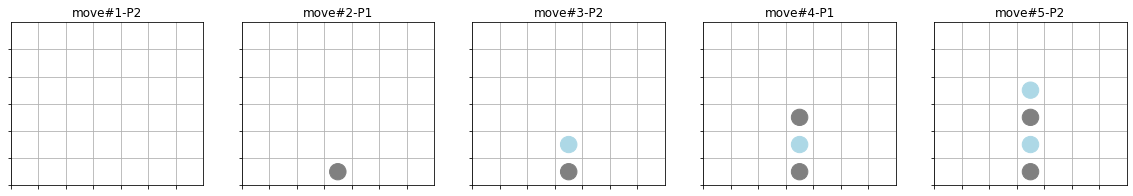

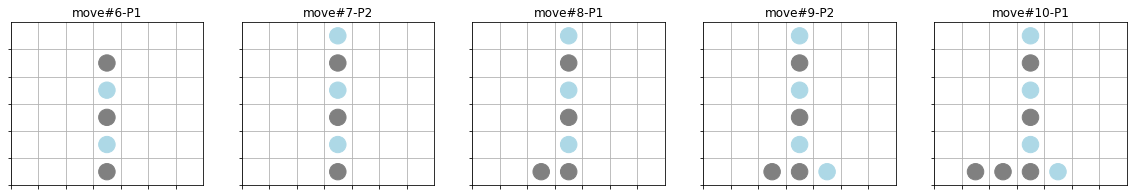

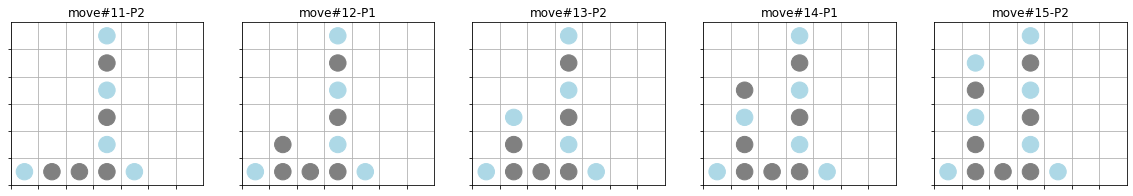

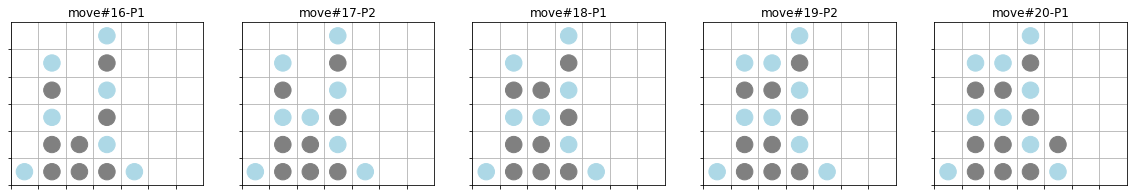

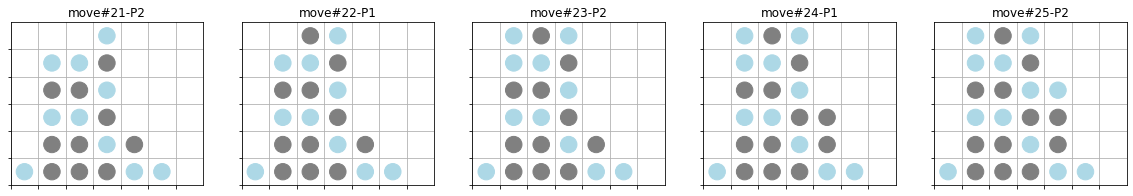

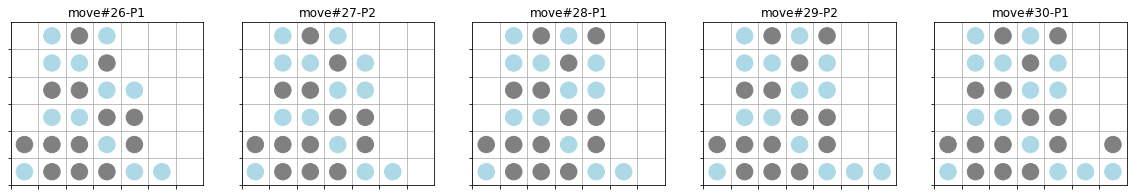

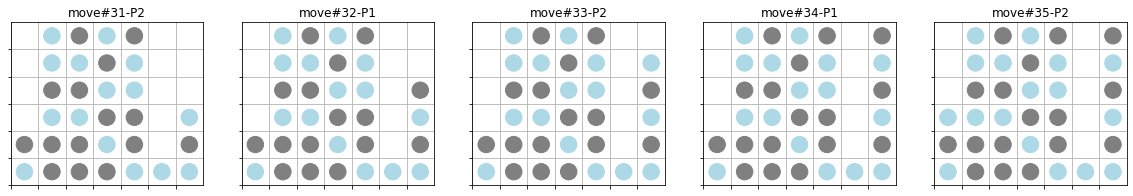

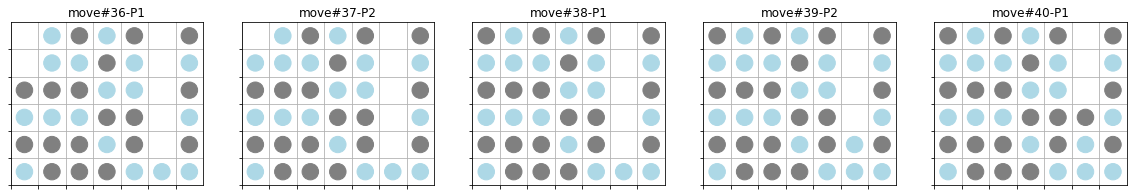

In [76]:
import matplotlib.pyplot as plt
data = c4.train.consolidate_selfplay_from_pickle('../data/gen9_400_003-0-003.pkl')

# get all starting positions
starts = np.where(np.abs(data['input_boards']).sum(axis=1).sum(axis=1)==0)[0]

N = 5
i = 0

i = np.random.choice(len(starts)-1)

input_boards = data['input_boards'][starts[i]:starts[i+1],:,:]
input_players = data['input_next_to_move'][starts[i]:starts[i+1]]
for i, (board, player) in enumerate(zip(input_boards, input_players)):
    if i % N == 0:
        fig, ax = plt.subplots(1, N,figsize=(N * 4,3))
    board = c4.game.ConnectFourBoard.from_array(board)
    state = c4.game.ConnectFourGameState(board=board, next_player=player)
    c4.render.renderConnectFour(state, ax=ax[i % N])
    ax[i % N].set_title(f"move#{i+1}-P{0.5*state.next_player+1.5:.0f}")



In [66]:
import time

w = '|'
for _ in range(10):
    w += '|'
    print(w, end='\r')
    time.sleep(.03)

In [11]:
class TestConnectFourGame:
    pass

def test_game_result_horizontal(self):
    

In [10]:
board = game.ConnectFourBoard.from_array(np.array([[0,0,1],[1,-1,-1]]))
str(board)

'ConnectFourBoard\n  .  .  X\n  X  O  O'

In [49]:
state = generate_test_state([1,2])

In [54]:
str(state)

'ConnectFourGameState(board:\n\tConnectFourBoard\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  .  .  .  .  .  .\n  .  X  O  .  .  .  .\n\tnext_player=x'

In [57]:
state = generate_test_state([1,2])


In [47]:
state = generate_test_state([1,1,1,1,1,1])
legal_actions = state.get_legal_actions()
coords = [action.x_coordinate for action in legal_actions]
coords = [0,2,3,4,5,6]

In [14]:
# reload pre-trained evaluator
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)

build_model
Metal device set to: Apple M1 Pro


2022-03-09 14:29:44.747243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-09 14:29:44.747367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


To see model details, enter:
	>>> <pvn>.summary()


build_model
To see model details, enter:
	>>> <pvn>.summary()


2022-03-11 13:33:34.752788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


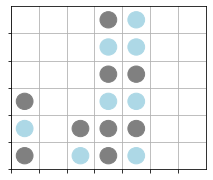

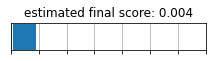

In [387]:
def generate_test_state(played_positions: list[int]) -> c4.game.ConnectFourGameState:
    """allows to generate a state, based on a succession of moves."""
    board = game.ConnectFourBoard()
    state = c4.game.ConnectFourGameState(board, next_player=game.Player.x)
    for position in played_positions:
        action = c4.game.ConnectFourAction(position, state.next_player)
        state = state.move(action)
    return state

state = generate_test_state([3,4,4,4,3,3,3,3,4,4,3,4,0,2,2,0,0])

c4.render.renderConnectFour(state)
evaluator = c4.pvnet.PolicyValueNet(filename='../models/gen9.h5', quiet=True)
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

In [394]:
board = game.ConnectFourBoard()
state = c4.game.ConnectFourGameState(board, next_player=game.Player.x)
state.is_game_over()

True

In [405]:
import pandas as pd

In [409]:
# random self-play
def generate_random_game(render: bool = False) -> dict:
    board = game.ConnectFourBoard()
    state = c4.game.ConnectFourGameState(board, next_player=game.Player.x)
    game_length = 0
    
    while not state.is_game_over():
        if render:
            c4.render.renderConnectFour(state)
        actions = state.get_legal_actions()
        action = np.random.choice(actions)
        state = state.move(action)
        game_length +=1
    
    if render:
        c4.render.renderConnectFour(state)
        
    return {'game_length': game_length, 'result': state.game_result}

random_simulation = pd.DataFrame([generate_random_game() for _ in range(1000)])

In [410]:
random_simulation.describe()

,game_length,result
count,1000.000000,1000.000000
mean,21.458000,0.132000
std,7.466591,0.989725
min,7.000000,-1.000000
25%,16.000000,-1.000000
50%,21.000000,1.000000
75%,27.000000,1.000000
max,42.000000,1.000000


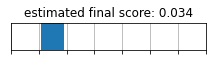

In [365]:
state.board.array = -state.board.array
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

In [366]:
p = c4.game.Player.x

In [372]:
Player['x']

<Player.x: -1>

In [342]:
played_positions = [3,4,4,4]
board = game.ConnectFourBoard()
state = c4.game.ConnectFourGameState(board, player=Player.x)
for position in played_positions:
    action = c4.game.ConnectFourAction(position, state.player)
    state = state.move(action)

NameError: name 'next_player' is not defined

In [341]:
set(np.unique(np.copy(board.array)))

{0}

In [330]:
board.copy()

AssertionError: array values must be either {0, 1, -1}

In [326]:
action

x:3 p:-1

In [240]:
from enum import Enum

class Player(Enum):
    x = -1
    o = 1
    
    def get_next(self):
        if self == Player.x:
            return Player.o
        else:
            return Player.x

player = Player.o
player.get_next()

<Player.x: -1>

In [127]:
import yaml

class DictToObject:
    def __init__(self, d: dict):
        self._d = d
        for k, v in d.items():
            if type(v) == dict:
                new_val = DictToObject(v)
            elif type(v) == list:
                new_val = [DictToObject(element) for element in d]
            else:
                new_val = v

            setattr(self, k, new_val)
            
    def __repr__(self) -> str:
        attributes = [f"{k}={v}" for k,v in self.to_dict().items()]
        
        return f"DictToObject({', '.join(attributes)})"
    
    def to_dict(self):
        return self._d

with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
config = DictToObject(config)

config.to_dict()
config
            
    
        

DictToObject(name=test, board={'width': 7, 'height': 6}, pvn={'block_size': 1, 'l2_const': '1e-4'}, training_config={}, mcts={'C_PUCT': 4, 'sims': 100, 'tau': 1}, selfplay={'tau_start': 1, 'tau_end': 0.1, 'threshold': 10})

In [110]:
attributes = [f"{k}={v}" for k,v in config.__dict__.items()]
",".join(attributes)

"name=test,board_config=DictToObject({'width': 7, 'height': 6}),pvn_config=DictToObject({'block_size': 1, 'l2_const': '1e-4'}),training_config=DictToObject({}),mcts_config=DictToObject({'C_PUCT': 4, 'sims': 100, 'tau': 1}),selfplay_config=DictToObject({'tau_start': 1, 'tau_end': 0.1, 'threshold': 10})"

In [84]:
config = Config()

In [86]:
config.board_config

{'width': 7, 'height': 6}

In [72]:
m.board_config.height

6

In [229]:
state.game_result

-1

IndexError: index 0 is out of bounds for axis 0 with size 0

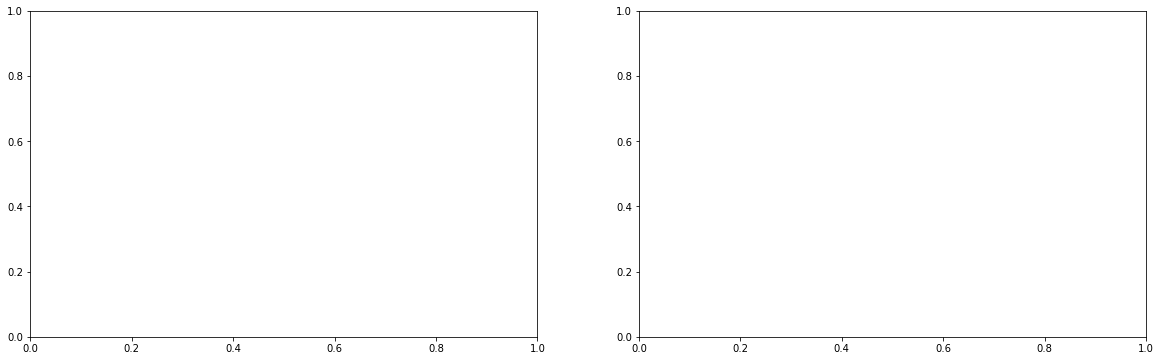

In [204]:
c4.viz.compare_players(logpath='../logs')

In [194]:
state.board

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0, -1,  1,  0,  0]])

In [ ]:
class ConnectFourBoard:
    def __init__(self, x_size, y_size):
        self.board = np.zeros(x_size, y_size)
        
    def update_board(self, column, )

In [16]:
state = np.zeros((6,7))
state = c4.game.ConnectFourGameState(state)
evaluator.infer_from_state(state)

2022-03-09 14:30:55.289730: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-09 14:30:55.337157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(array([0.02277379, 0.12248434, 0.14792278, 0.42892304, 0.15953705,
        0.10054208, 0.01781694], dtype=float32),
 0.11540254950523376)

In [24]:
state.get_legal_actions()

[x:0 v:1, x:1 v:1, x:2 v:1, x:3 v:1, x:4 v:1, x:5 v:1, x:6 v:1]

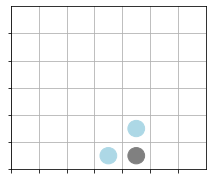

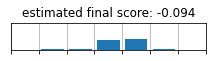

In [168]:
state = c4.game.ConnectFourGameState(np.zeros((6,7)), next_to_move=-1)
actions = [(3,-1),(4,1), (4,-1)]
for action in actions:
    state = state.move(c4.game.ConnectFourAction(*action))
c4.render.renderConnectFour(state)
policy, value = evaluator.infer_from_state(state)
c4.render.render_policy(policy, title=f"estimated final score: {value:.3f}")

In [ ]:
import yaml



In [41]:
player = c4.player.AzPlayer(evaluator)
player

AzPlayer(evaluator=PolicyValueNet(name=gen9))

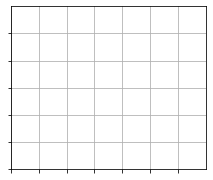

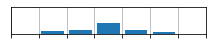

In [22]:
state = np.zeros((6,7))
state.move
c4.render.renderConnectFour(state)
c4.render.render_policy(evaluator.infer_from_state(state)[0], title="")

In [3]:

c4.game.ConnectFourGameState()

x:1 v:1